**Data Generation**

*   We start by genetating test data for a period of 1 year. Data generated is of the last year.
*   Data should present timestamp as well as product name, category and revenue
*   A one year data should be enough for training the model, a perriod of 3 years is recommended to catch seasonal impact




In [ ]:
import csv
import random
from datetime import datetime, timedelta

# Sample data
products = [
    "Comprehensive Insurance",
    "Third-Party Insurance",
    "Collision Insurance",
    "Personal Injury Protection"
]
categories = ["Basic", "Premium", "Gold", "Platinum"]

# Start and end dates
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 1, 1)
delta = timedelta(days=1)

# Create CSV
with open("insurance_revenue_data.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Timestamp", "Product", "Category", "Revenue"])

    current_date = start_date
    while current_date <= end_date:
        product = random.choice(products)
        category = random.choice(categories)
        revenue = round(random.uniform(100, 1000), 2)
        random_time = datetime.combine(current_date, datetime.min.time()) + timedelta(
            seconds=random.randint(0, 86399)
        )

        writer.writerow([
            current_date.strftime("%Y-%m-%d"),
            random_time.strftime("%Y-%m-%d %H:%M:%S"),
            product,
            category,
            revenue
        ])
        current_date += delta


In [ ]:
**Load Data**

*  We do date conversion to ensure that timestamps are in right format
*  We present some of data to have preview of availale coliumns




SyntaxError: invalid syntax (<ipython-input-34-6caa122fcc3e>, line 1)

In [ ]:
from google.cloud import storage
import os

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV into a DataFrame
df = pd.read_csv('insurance_revenue_data.csv')

# Convert 'Date' and 'Timestamp' columns to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Preview the data
df.head()


,Date,Timestamp,Product,Category,Revenue
0,2024-01-01,2024-01-01 12:05:15,Comprehensive Insurance,Basic,231.82
1,2024-01-02,2024-01-02 06:03:45,Collision Insurance,Basic,246.12
2,2024-01-03,2024-01-03 16:33:15,Personal Injury Protection,Gold,780.11
3,2024-01-04,2024-01-04 11:39:53,Comprehensive Insurance,Platinum,173.95
4,2024-01-05,2024-01-05 00:30:20,Personal Injury Protection,Platinum,350.63


**Visualise Data**

*  Here we are visualising the 12 month revene trend on a graph


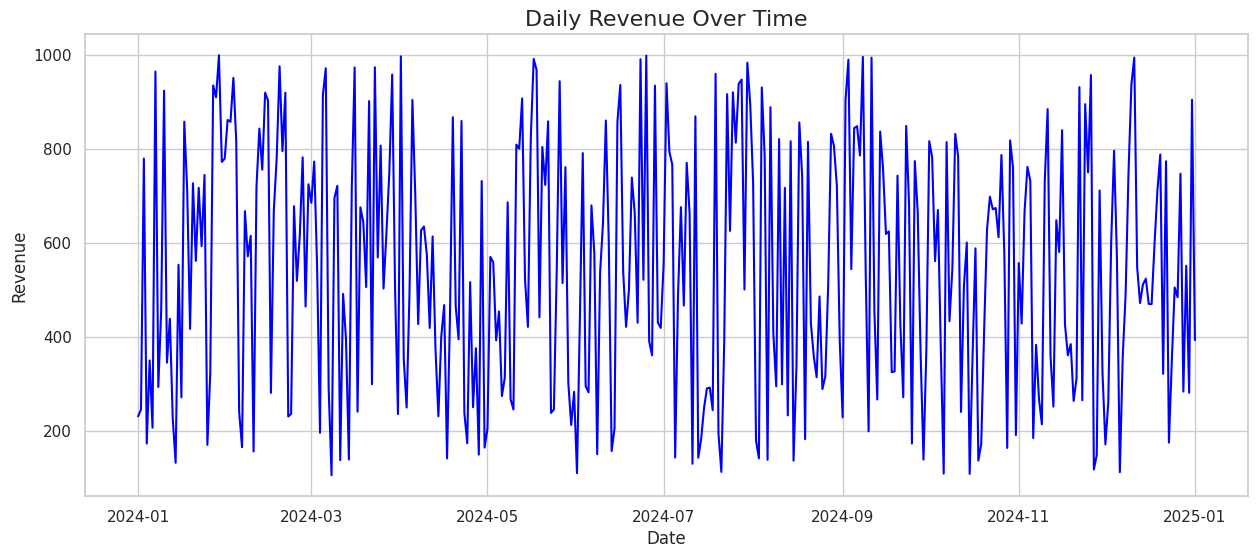

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Revenue', data=df, color='blue')
plt.title('Daily Revenue Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


In [ ]:
!pip install timesfm



In [ ]:
import timesfm

data=pd.read_csv('insurance_revenue_data.csv')
data.head()

,Date,Timestamp,Product,Category,Revenue
0,2024-01-01,2024-01-01 12:05:15,Comprehensive Insurance,Basic,231.82
1,2024-01-02,2024-01-02 06:03:45,Collision Insurance,Basic,246.12
2,2024-01-03,2024-01-03 16:33:15,Personal Injury Protection,Gold,780.11
3,2024-01-04,2024-01-04 11:39:53,Comprehensive Insurance,Platinum,173.95
4,2024-01-05,2024-01-05 00:30:20,Personal Injury Protection,Platinum,350.63


In [ ]:
data['Timestamp']=pd.to_datetime(data['Timestamp'])
data.head()

,Date,Timestamp,Product,Category,Revenue
0,2024-01-01,2024-01-01 12:05:15,Comprehensive Insurance,Basic,231.82
1,2024-01-02,2024-01-02 06:03:45,Collision Insurance,Basic,246.12
2,2024-01-03,2024-01-03 16:33:15,Personal Injury Protection,Gold,780.11
3,2024-01-04,2024-01-04 11:39:53,Comprehensive Insurance,Platinum,173.95
4,2024-01-05,2024-01-05 00:30:20,Personal Injury Protection,Platinum,350.63


In [ ]:
df = pd.DataFrame({'unique_id':[1]*len(data),'ds': data["Timestamp"],
"y":data['Revenue']})

In [ ]:
# Spliting into 94% and 6%
split_idx = int(len(df) * 0.94)
# Split the dataframe into train and test sets
train_df = df[:split_idx]
test_df = df[split_idx:]
print(train_df.shape, test_df.shape)

(344, 3) (23, 3)


In [ ]:
import timesfm

In [ ]:

import inspect
print(inspect.getfullargspec(timesfm.TimesFm).args)

tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="cpu",
          per_core_batch_size=28,
          horizon_len=128,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-1.0-200m-pytorch"),
  )

['self', 'hparams', 'checkpoint']


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
timesfm_forecast = tfm.forecast_on_df(
   inputs=train_df,       # Input training data for training
   freq="MS",             # Frequency of the time-series data
   value_name="y",        # Name of the column containing the values to be forecasted
   num_jobs=-1,           # Set to -1 to use all available cores
)
timesfm_forecast = timesfm_forecast[["ds","timesfm"]]

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [ ]:
timesfm_forecast.head()


,ds,timesfm
0,2025-01-01 20:52:24,433.436890
1,2025-02-01 20:52:24,426.612946
2,2025-03-01 20:52:24,437.984039
3,2025-04-01 20:52:24,442.494415
4,2025-05-01 20:52:24,447.952332


In [ ]:
**Generate output**

*  Generate a sample csv file with the prediction data generated from time-series
*  We present some of data to have preview of availale coliumns




In [ ]:
timesfm_forecast.to_csv('output_file.csv', index=False)
